In [1]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy 

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import tweepy #used to work with Twitter's API
import webbrowser
import time
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import json

In [4]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN" #pulled from developer account for Twitter
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ" #pulled from developer account for Twitter
#key and secret is generated by Twitter developer account

In [5]:
callback_uri = 'oob'#url 

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri) #authorization to pull data from Twitter's API
redirect_url = auth.get_authorization_url() 
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=EpN3VQAAAAABQdBPAAABeojQ5Sk


In [7]:
webbrowser.open(redirect_url)

True

In [8]:
user_pint_input = input("What's the pin value? ") #this is based upon Twitter Developer account
#Pin is generated new everytime this cell is run

What's the pin value? 0782125


In [9]:
auth.get_access_token(user_pint_input)

('781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2',
 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41')

In [10]:
print(auth.access_token, auth.access_token_secret)

781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2 fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41


In [11]:
api = tweepy.API(auth)

In [12]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append("user")
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [13]:
# pulls data from Visual Studio Code's twitter page https://twitter.com/code
screen_name = input("Enter twitter's username to pull data from: ") #"code"
#user = api.get_user(screen_name)
#user_timeline = user.timeline(screen_name)  # recent tweets are pulled in the spreadsheet
#print(user_timeline) 
# fetching the statuses
user_timeline = api.user_timeline(screen_name, count=201)#tweet count limit is 200
df1 = extract_timeline_as_df(user_timeline)
print(df1)


Enter twitter's username to pull data from: slykimba
    in_reply_to_status_id_str  favorite_count               id_str  \
0         1413236411302563841               0  1413236465635573760   
1         1413235754386534401               0  1413236248668516355   
2         1413229420387700745               2  1413235637680025607   
3         1413135561787772940               0  1413202337301254149   
4                         NaN               0  1413189943397126150   
..                        ...             ...                  ...   
194                       NaN               0  1410776423472771072   
195       1410775622394187780               1  1410776136972488709   
196                       NaN               0  1410775741088796674   
197                       NaN               0  1410774058367660032   
198                       NaN               0  1410773923831091202   

                 source                                               text  \
0    Twitter for iPhone     

In [14]:
screen_name = input("Enter twitter's username to pull data from: ") #pulls data from Visual Studio Code's twitter page https://twitter.com/code
user = api.get_user(screen_name)
user_timeline = user.timeline() 
df1 = extract_timeline_as_df(user_timeline) #recent tweets are pulled in the spreadsheet
df1.head(201)

Enter twitter's username to pull data from: slykimba


,in_reply_to_status_id_str,favorite_count,id_str,source,text,quoted_status_id_str,in_reply_to_user_id_str,source_url,in_reply_to_screen_name,quoted_status_id,id,lang,retweet_count,in_reply_to_status_id,in_reply_to_user_id,user,author
0,1413236411302563841,0,1413236465635573760,Twitter for iPhone,@CarterDerrell Well 👀👀👀,NaN,2187166623,http://twitter.com/download/iphone,CarterDerrell,NaN,1413236465635573760,en,0,1.413236e+18,2.187167e+09,SlyKimba,SlyKimba
1,1413235754386534401,0,1413236248668516355,Twitter for iPhone,@CarterDerrell 👀,NaN,2187166623,http://twitter.com/download/iphone,CarterDerrell,NaN,1413236248668516355,und,0,1.413236e+18,2.187167e+09,SlyKimba,SlyKimba
2,1413229420387700745,2,1413235637680025607,Twitter for iPhone,@CarterDerrell This is Alice before she pulls ...,NaN,2187166623,http://twitter.com/download/iphone,CarterDerrell,NaN,1413235637680025607,en,0,1.413229e+18,2.187167e+09,SlyKimba,SlyKimba
3,1413135561787772940,0,1413202337301254149,Twitter for iPhone,@EvanSoul_ita Congrats playa! Nothing but bles...,NaN,359067286,http://twitter.com/download/iphone,EvanSoul_ita,NaN,1413202337301254149,en,0,1.413136e+18,3.590673e+08,SlyKimba,SlyKimba
4,NaN,0,1413189943397126150,Twitter for iPhone,Been completely struggling today but at least ...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1413189943397126150,en,0,NaN,NaN,SlyKimba,SlyKimba
5,NaN,0,1413166489222459392,Twitter for iPhone,Lets goooooo 🗣🗣🗣 https://t.co/19IIRkkLrE,1413108729009119239,NaN,http://twitter.com/download/iphone,NaN,1.413109e+18,1413166489222459392,en,0,NaN,NaN,SlyKimba,SlyKimba
6,NaN,0,1412965754656501762,Twitter for iPhone,RT @iGetCurved_: The “WHAT ARE THOSEEE” era wa...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1412965754656501762,en,19,NaN,NaN,SlyKimba,SlyKimba
7,NaN,0,1412946753142378498,Twitter for iPhone,RT @TobysWurld: @ someone you proud of today &...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1412946753142378498,en,9321,NaN,NaN,SlyKimba,SlyKimba
8,NaN,0,1412940205351489539,Twitter for iPhone,RT @VGFGamers: some of y’all 😂 https://t.co/ou...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1412940205351489539,en,162,NaN,NaN,SlyKimba,SlyKimba
9,1412934155021819905,0,1412934716538372099,Twitter for iPhone,@Kel_Kels_ https://t.co/Oe5BFECQXS,NaN,1066127834454863873,http://twitter.com/download/iphone,Kel_Kels_,NaN,1412934716538372099,und,0,1.412934e+18,1.066128e+18,SlyKimba,SlyKimba


In [15]:
df1.describe()

,favorite_count,quoted_status_id,id,retweet_count,in_reply_to_status_id,in_reply_to_user_id
count,20.000000,1.000000e+00,2.000000e+01,20.000000,1.300000e+01,1.300000e+01
mean,0.200000,1.413109e+18,1.413018e+18,2320.300000,1.413014e+18,3.280393e+17
std,0.523148,NaN,1.310603e+14,8401.325754,1.375112e+14,5.121512e+17
min,0.000000,1.413109e+18,1.412929e+18,0.000000,1.412913e+18,4.088661e+07
25%,0.000000,1.413109e+18,1.412929e+18,0.000000,1.412928e+18,4.680170e+08
50%,0.000000,1.413109e+18,1.412935e+18,0.000000,1.412930e+18,2.187167e+09
75%,0.000000,1.413109e+18,1.413172e+18,0.250000,1.413136e+18,1.066128e+18
max,2.000000,1.413109e+18,1.413236e+18,36903.000000,1.413236e+18,1.066128e+18


In [16]:
df1.shape

(20, 17)

In [17]:
df1.to_csv('tweetspreadsheet.csv', index=False)

In [18]:
df1_saved_file = pd.read_csv('tweetspreadsheet.csv')
df1_saved_file

,in_reply_to_status_id_str,favorite_count,id_str,source,text,quoted_status_id_str,in_reply_to_user_id_str,source_url,in_reply_to_screen_name,quoted_status_id,id,lang,retweet_count,in_reply_to_status_id,in_reply_to_user_id,user,author
0,1.413236e+18,0,1413236465635573760,Twitter for iPhone,@CarterDerrell Well 👀👀👀,NaN,2.187167e+09,http://twitter.com/download/iphone,CarterDerrell,NaN,1413236465635573760,en,0,1.413236e+18,2.187167e+09,SlyKimba,SlyKimba
1,1.413236e+18,0,1413236248668516355,Twitter for iPhone,@CarterDerrell 👀,NaN,2.187167e+09,http://twitter.com/download/iphone,CarterDerrell,NaN,1413236248668516355,und,0,1.413236e+18,2.187167e+09,SlyKimba,SlyKimba
2,1.413229e+18,2,1413235637680025607,Twitter for iPhone,@CarterDerrell This is Alice before she pulls ...,NaN,2.187167e+09,http://twitter.com/download/iphone,CarterDerrell,NaN,1413235637680025607,en,0,1.413229e+18,2.187167e+09,SlyKimba,SlyKimba
3,1.413136e+18,0,1413202337301254149,Twitter for iPhone,@EvanSoul_ita Congrats playa! Nothing but bles...,NaN,3.590673e+08,http://twitter.com/download/iphone,EvanSoul_ita,NaN,1413202337301254149,en,0,1.413136e+18,3.590673e+08,SlyKimba,SlyKimba
4,NaN,0,1413189943397126150,Twitter for iPhone,Been completely struggling today but at least ...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1413189943397126150,en,0,NaN,NaN,SlyKimba,SlyKimba
5,NaN,0,1413166489222459392,Twitter for iPhone,Lets goooooo 🗣🗣🗣 https://t.co/19IIRkkLrE,1.413109e+18,NaN,http://twitter.com/download/iphone,NaN,1.413109e+18,1413166489222459392,en,0,NaN,NaN,SlyKimba,SlyKimba
6,NaN,0,1412965754656501762,Twitter for iPhone,RT @iGetCurved_: The “WHAT ARE THOSEEE” era wa...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1412965754656501762,en,19,NaN,NaN,SlyKimba,SlyKimba
7,NaN,0,1412946753142378498,Twitter for iPhone,RT @TobysWurld: @ someone you proud of today &...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1412946753142378498,en,9321,NaN,NaN,SlyKimba,SlyKimba
8,NaN,0,1412940205351489539,Twitter for iPhone,RT @VGFGamers: some of y’all 😂 https://t.co/ou...,NaN,NaN,http://twitter.com/download/iphone,NaN,NaN,1412940205351489539,en,162,NaN,NaN,SlyKimba,SlyKimba
9,1.412934e+18,0,1412934716538372099,Twitter for iPhone,@Kel_Kels_ https://t.co/Oe5BFECQXS,NaN,1.066128e+18,http://twitter.com/download/iphone,Kel_Kels_,NaN,1412934716538372099,und,0,1.412934e+18,1.066128e+18,SlyKimba,SlyKimba


In [19]:
# screen name of the account to be fetched
screen_name = input("Enter twitter's username to see recent tweet interactions: ")
#will display last fetched tweet as the Twitter account's "Pinned Tweet" if they have a pinned tweet
  
# number of statuses to be fetched
count = 5
  
# fetching the statuses
statuses = api.user_timeline(screen_name, count = count)
  
# printing the statuses
for status in statuses:
    print(status.text, end = "\n\n") 

Enter twitter's username to see recent tweet interactions: slykimba
@CarterDerrell Well 👀👀👀

@CarterDerrell 👀

@CarterDerrell This is Alice before she pulls out her claws.

@EvanSoul_ita Congrats playa! Nothing but blessings for you and the fam!! ✨

Been completely struggling today but at least the lack of sleep was worth it this go around.



In [20]:
#search_words = ["#covid19", "2020", "lockdown"]
key_word = input("Enter key word to  pull from Twitter: ")#'@code' #searches all tweets that reference the key_word specified 
date_since = "2021-06-21"

tweets = tweepy.Cursor(api.search, key_word, geocode="38.892062,-77.019912,3000km", lang="en", since=date_since).items(10)
## the geocode is for Washington, DC; format for geocode="lattitude,longitude,radius"
## radius should be in miles or km
#items references the number of tweets to pull 


for tweet in tweets:
    print("created_at: {}\nuser: {}\ntweet text: {}\ngeo_location: {}".
            format(tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location))
    print("\n")
## tweet.user.location will give you the general location of the user and not the particular location for the tweet itself, as it turns out, most of the users do not share the exact location of the tweet

Enter key word to  pull from Twitter: olympic
created_at: 2021-07-09 01:10:16
user: BillStanton10
tweet text: @FirstTake 
AHHH,he's so great &amp; wealthy now,surely he knows what's best for Olympic Athletes breaking rules/polici… https://t.co/XxrIQLlzOf
geo_location: USA


created_at: 2021-07-09 01:10:13
user: red_124_57
tweet text: RT @FirstTake: Patrick Mahomes speaks on Sha'Carri Richardson being left off the Olympic relay team.

"She put in the work. Even though she…
geo_location: kc mo


created_at: 2021-07-09 01:09:53
user: SFAHS_Bulldogs
tweet text: RT @FBISDAthletics: Congrats to Simone Manuel, AHS Bulldog Alumni. @AHSBulldogs @FortBendISD @swimone 

https://t.co/T6jHm67v5M
geo_location: Sugar Land, TX


created_at: 2021-07-09 01:09:49
user: MACKabiVIPer42
tweet text: Spectators to face Olympic ban as Tokyo declares coronavirus emergency https://t.co/vK77epfxvh via @nbcnews
geo_location: Los Angeles, California


created_at: 2021-07-09 01:09:36
user: michaelstjames
tweet text:

In [21]:
#searches all relevant tweet as specified from date range 
print("Date format is as follows: Year-Month-Day= 0000-00-00")
print("Date range must be within a 7 day range")
date_since = input("Enter beginging date: ")#'2021-06-14'
date_until = input("Enter last date: ")#'2021-06-21'
tweets = tweepy.Cursor(api.search,q= input("Enter key word to search through Twitter's API of relevant Tweets: "), since=date_since,until=date_until).items(10) #'olympic'
for tweet in tweets:         
    print (tweet.text)  

Date format is as follows: Year-Month-Day= 0000-00-00
Date range must be within a 7 day range
Enter beginging date: 2021-07-01
Enter last date: 2021-07-08
Enter key word to search through Twitter's API of relevant Tweets: olympic
RT @AUSOlympicTeam: Set your ⏰  for 6pm AEST / 5.30pm ACST / 4pm AWST tonight for a special one-hour program where your two Olympic Flag Be…
RT @ipacglobal: European Parliament to call for Beijing Olympic boycott | SCMP

Motion backed by #IPAC 🇪🇺 members @EnginEroglu_FW @bueti @M…
#stillintainydays #rainyday
#nikeplus #ship #olympic #sea #cloudy 場所: 象の鼻パーク https://t.co/xDzcpzO3N4
RT @usabasketball: 🇺🇸 3x Olympian
🇺🇸 39-0 career USA record
🇺🇸 Ranks first all-time in men's U.S. Olympic PPG (19.4) &amp; 3FG made (59)

👋 @KD…
Gregg Popovich plans to work Kevin Love’s ‘a-s off,’ believes Olympics can rejuvenate his career: https://t.co/jJfEGAGGmm
RT @jcp_cc: 早急に全て中止の決断を。

五輪無観客なら「学校連携観戦」中止へ…希望６０万枚、当初は別枠扱い予定

『政府と東京五輪・パラリンピック大会組織委員会は、東京五輪で無観客とする競技では、児童生徒向けにチケットを割り当て

In [22]:
for status in tweepy.Cursor(api.user_timeline, screen_name= input("Enter Twitter Username: "), tweet_mode="extended").items(): #'@code'
    print(status.full_text)

Enter Twitter Username: code
RT @TylerLeonhardt: Look at that badge to open in @code ✨

Pretty easy markdown to add to README in a GitHub repo:

[![Open in Visual Studi…
@KlostermannSan @github Traditionally, we've named releases according to the month work was done in. Our team did most of the work for this release in June, so this is the June release!
🎉 The June VS Code release is here! Check out what’s new:

🖥 Open a terminal in the editor area
🧮 Add math formulas to Markdown
🔖 “Open in VS Code” badge for @GitHub repos
…and more!

Release notes: https://t.co/ik1X7EvE2o
Download: https://t.co/rLDTD8Hj2J https://t.co/oXvsjacAPA
We 💚 this WindowsNT-inspired theme by @manekinekko. For the nostalgic ones ☺️
https://t.co/S7IGMgfVwj https://t.co/3mwbjLkPlN
Coding in VS Code with @GitHub Copilot 🪄
https://t.co/4SYDyYFYQ4
Have you seen our Machine Learning for beginner course? 🎓 Get started with ML using notebooks in VS Code👇 https://t.co/QmezIHoZpn
@jfarrell Yes! You can set language-specif

@olafurw We are working to make development environments safer and reduce the possibility of supply-chain attacks, even in code that is cloned locally. You can read more in the link below, but please do share your feedback with us on how it could be improved. https://t.co/O9FnntW1gx
RT @miguelsolorio_: 🚀 Now that we shipped terminal tabs in @code, I wanted to share a little bit of the backstory of how it all came about.…
Missed the live event? 🎉 You can now watch the recording on our YouTube channel.
Link 👉 https://t.co/cDBBuSuuh9 https://t.co/sJjzNWkikA
@theGoldyMan @mattbierner We are on Electron 12 currently in the Stable branch
🎉 The May @code release is here! Check out what's new:

📖 Remote Repositories to read code w/o cloning 
🚶🏽‍♀️"Getting Started" product walk-throughs
✔️ Safe code browsing with Workspace Trust
...and more!

Release notes: https://t.co/vlQb1l5wyc
Download: https://t.co/1CSkQpMbwd https://t.co/OTu4omncay
📣 We're going live shortly with the latest release party!

The Student Zone at #MSBuild welcomes all students, career changers, life-long learners, and even professionals!
You'll find awesome sessions about tech like VS Code, GitHub, AI… and languages like Python, Javascript, C#, and more.
Start learning 👉 https://t.co/lvdEC7YKJV https://t.co/VgRd4VL5M4
The latest version of the #Python extension for VS Code now includes the new Pylance language server by default for a much better Python editing experience 🐍
Read more 🔗 https://t.co/xdLwpMHZGN https://t.co/8NtJHCoJbg
Starting in a few mins! Join our release party for VS Code 1.56 and Q&amp;A with the team 📺
Join live 👉 https://t.co/iPWBnPU2BC https://t.co/g2Lu0Z8i6y
RT @filipmares: TIL that you can build @MicrosoftTeams apps from @code using the Teams Toolkit. Love to see all this come together. 

https…
How-to with VS Code 👇
1️⃣ Set language mode as JSON
2️⃣ Paste your JSON
3️⃣ From the command palette (CTRL+SHIFT+P or CMD+SHIFT+P) run "&gt; Format document" https://t.co/LKjKk24x76 https://t.

🍿 Starting soon! Join us for a livestream and Q&amp;A about the new notebook extensions in VS Code.
Learn what's coming and the APIs you can use to build your own too 📘

Starting LIVE in 10 mins ▶️ https://t.co/iPWBnPU2BC https://t.co/U8YuEwRiKE
We have a new VS Code extension for developers using CUDA, built in partnership with Nvidia, that will help building apps that use GPU acceleration for massively-parallel computing 👇 https://t.co/5E4fiZo7Nf
Want to know more about the new notebook extensions in VS Code, and custom notebooks like the RESTbook? 📘 Don't miss @_tanhakabir's livestream and Q&amp;A tomorrow, to learn about them and how YOU can build your own! 🧑‍💻
More info 👉https://t.co/DPze49WGS6 https://t.co/YCd3XrYaXH
RT @mattbierner: Today's @code tip: Problems filter negation

Use ! to negate the problems view filter. '!foo' for example only shows probl…
RT @davidpine7: Sometimes when you're doing all the @code things, you just need a little Zen. Try #ZenMode, it comes highly re

Yesterday we talked with @ShinanYotam as he was giving us a demo of AI-assisted auto-complete in VS Code with @Tabnine_ (and what the future of coding might be like!) 📺
If you missed the session, you can catch the recording on-demand now 👉 https://t.co/yk0MYPqPCs https://t.co/3nsnH2sEvV
Check out this fun tool by @miketromba to make your own themes for VS Code 🎨

Feel free to share your creations with us in the comments 🧑‍🎨
https://t.co/AE52zuD4L3
RT @RobLauer: Your First Steps with @Raspberry_Pi Pico and Visual Studio @Code

I had fun experimenting a bit with MicroPython on the Pico,…
RT @fbricon: Cool new feature: the @rhdevelopers 's YAML extension for @code now displays a link to the schema used to validate the current…
📺 Starting in 10 mins! We're talking with @ShinanYotam from @Tabnine_ about AI-driven autocomplete in VS Code 💻 Join us for the live session and Q&amp;A on @LearnTV
Join live 👉 https://t.co/iPWBnPCrd2
RT @eliostruyf: Publishing your #VSCode #Extensions from #GitHub 

RT @codepo8: 🚨 Hot off the press: Microsoft Edge Devtools for @code version 1.1.4. 
👉🏻 Interact with your web project and debug CSS/network…
RT @LadyNaggaga: .NET Notebooks with SQL in @code!  Checkout #dotnetinteractive latest blog post in collaboration with @azuredatastudio on…
RT @davidpine7: 🔍 I'm often amazed at how many developers are unaware of the keyboard shortcut to zoom in/out on their @code instances.

⌨…
The February @code release is here! Check out what's new 🎉

🍎 Apple Silicon builds now stable
🖋️ New themeable icons
💻 Persistent terminal processes
... and more!

Release notes: https://t.co/ahDVkF8age
Download: https://t.co/1CSkQpuA7D https://t.co/tpAIQVv5SN
RT @LostInTangent: If you're using @code and @reactnative, you can now use CodeSwing to prototype components 🔥 Just create a React Native s…
RT @rorypreddy: Azure API Management extension for Visual Studio @Code is now generally available.

-Manage and test APIs in API Management…
RT @juristr: Ever wondered how to st

RT @eamodio: Thoughts on a new exploration of showing unpublished commits/changes in the @code SCM view?

Please add your thoughts and feed…
VS Code tips and tricks by @Sana_Ajani 🎩  PS: Watch till the end to learn how to enable Power Mode too 🔥
Watch 🎥  https://t.co/nVXXNvK2io https://t.co/HDKynQzc4G
RT @TylerLeonhardt: 🧑‍💻 Stream tomorrow 10AM PST (take 3) 🎉
https://t.co/lfWDeJuI9V

We'll look at the popular @code API called 'CodeLens'…
Quick recap of @pmckee's session at #VSCodeDay on using working @Docker in VS Code  📦
Watch the recording to learn more 👉  https://t.co/JS3SIwBk9x https://t.co/Sz5x0y5cwe
Yesterday's launch party was fun!! 🎊 Missed it? Check out the recording below 👇
https://t.co/JTmO3vScMU https://t.co/bots8R04rG
@CodingWithJulia ... if you use setting sync, it is easy to set up a new machine. just install vs code on the new machine, turn on settings sync, then all those settings AND extensions will be brought down to the new machine! https://t.co/jF8PbGMnJ9
Quick tu

RT @TylerLeonhardt: Today, I made and published a @code extension in ~2hr (it's that easy!)

Take a look at the Twitch vod here: https://t.…
RT @faxtion: VSCode zoom only font not whole editor 
https://t.co/TfnvVZ9TaI
RT @mattwojo: Working on a new episode of Tabs vs Spaces with @BrigitMurtaugh about doing remote development with Docker Containers and the…
@Johnight1 @BrigitMurtaugh We will!

You can also optionally sign up on https://t.co/2ZVOzfkQSR to get an email reminder (we'll use your email only to send you a reminder before the event and a "thank you" note/recap after)
Coming up at #VSCodeDay: @BrigitMurtaugh will talk about Remote Development with VS Code, including SSH and Containers! 👩‍💻👨‍💻 Live on Jan 27 at 8am Pacific Time 🗓
RSVP here 👉 https://t.co/2ZVOzfkQSR https://t.co/9260P4mlqM
RT @mattbierner: Today's @code tip: the minimap slider

The minimap slider shows the current viewport in the file. You can also click and d…
RT @amandaksilver: In 2021, we can come together to 

RT @LearnTV: There are over 115 MILLION daily active users on @MicrosoftTeams! 🌎🌍🌏

Join us on December 16th at 9 AM 🕘 PDT to build your fi…
RT @graeme_fulton: I didn't know this exists until today 😭..I can never can remember how to start a new component

Now just type 'rcc' and…
RT @JustinWGrote: Smart. Added to my @code default config. https://t.co/T6F1C1pP9o
RT @mattbierner: Today's @code tip: Saving search editors

Save search editors into your workspace as .code-search files. Open the file to…
@TylerLeonhardt Welcome! Excited for you to join the team! :)
RT @jayharr_is: Just realized that you can rename terminal tabs in VSCode.

Cmd + Shift + P &gt; Terminal:Rename https://t.co/dj7awt7D5G
🗯 Looking forward answering your questions at the "Ask Me Anything" tomorrow! Come join the VS Code product team for this free live event at 8am Seattle time (4pm London) 🗓

📺 More info: https://t.co/XbmjE45mFJ https://t.co/58ikRgHAJl
🎥 Livestream: https://t.co/FY9q4jZXHB
About to start… Don't mi

@SeanPlusPlus https://t.co/81HQV4bYu9
@zogface https://t.co/SkgZHGr8Dh
@frontenddude …backup two months old and offsite
https://t.co/Ejosa9ND0k
"We pushed to production on Friday…" 😱

What's your dev horror story? Share it below in six words or less:
RT @mattbierner: Today's @code command: Add Cursors to Line Ends

Add a cursor at the end of each line of the current selection. Useful for…
RT @NillsF: ARM tools in @code are pretty awesome. Need to create a VM? Just type arm-vm-ubuntu &lt;enter&gt; and you get all boilerplate code. h…
RT @mattbierner: Today's @code extension: Docs View

Shows documentation at the current cursor position in the sidebar or panel. 

Features…
RT @mattbierner: Today's @code extension: Peacock

Give each VS Code window a distinct color based on the current workspace

Run `Peacock:…
RT @pythonvscode: The 🎃 October 2020 release of the #Python extension 🐍 for VS @code is here! This release brings Debugpy 1.0! Check out th…
@gbziskind You can run the publish comm

Join our team on Tuesday at 15:00 UTC for the launch party livestream! 🗓1️⃣3️⃣🕒🌞 We'll go through what's new in @Code 1.50 and answer your questions 💬

👉 Add to calendar: https://t.co/nE4PHMG4wu
@ItalyPaleAle @SabaJamalian @RobertCGreenII @BrigitMurtaugh here is a blog post: https://t.co/dZNdXgqg92
RT @demianborba: Great collaboration with @code and awesome partners on a brand new extension for Visual Studio Code to help designers and…
RT @logicappsio: New @code extension with the monitoring view update is now published.

Install via 👉 https://t.co/8no7G6fNoJ https://t.co/…
RT @tweetmonster999: You can preview your .md(markdown) file directly in your Visual Studio Code editor by using: 

Ctrl+K V

@code 
#Tips…
@andrejsharapov use the workbench.editor.pinnedTabSizing setting to change how the pinned tab should appear!
RT @TarasNovak: 8 months ago I created @mapbox token for #GeoDataViewer 🗺️ w/#keplerGL. Since then devs loaded over 50,000 maps with it in…
@n_chandresh_ yes, we did :)
@

📺 Tune in NOW!
Join the @Code team and @_clarkio at 9am Pacific for the live event and launch party for VS Code 1.49 (August 2020 release).
Join online for free 👉 https://t.co/nE4PHMG4wu https://t.co/UsgVo1a29m
RT @mattbierner: Today's @code tip: debugger pretty print

Step into a minified file while debugging your #JavaScript? Try using the built-…
RT @eamodio: 📢 Calling @code extension authors -- last call for sign ups for the Extension Authors call happening this Thursday!

Come join…
@BansalVks Hey there! You could modify the zoom level of your workspace specifically, rather than the zoom level found in user settings. https://t.co/WaDw1F4okR
Don't forget this is TOMORROW! 📅 Tune in for a live event and Q&amp;A with the VS Code team and @_clarkio at 9am Pacific. We'll share what's new in @code v1.49 (August 2020 release) and we'll answer your questions. 💬

More info and save the date 👉 https://t.co/bH9Z2mbDH7 https://t.co/MPlwW0AbIS
RT @Jureid22: We're proud to announce that C++ in 

@sabinthedev It looks like you want to customize your color theme: https://t.co/ZFkCnk92Eh. 

For the specific highlights you've pointed out, you could start off with your Activity Bar: activityBarBadge.background and activityBar.activeBorder.
RT @madyanalj: Do you (like me) use @code's git integration to view your diffs and wish to hide irrelevant whitespace changes so that you c…
RT @britnorcodes: Whats a VS code extension you've been enjoying lately? Or one that's improved your workflow?

Mine is ErrorLens! ⚠️ #vsco…
@0amaam @_clarkio Yes we'll publish the recording on YouTube shortly
RT @mattbierner: Today's @code command: Reveal in explorer

The 'Reveal in Explorer' command ('Reveal in Finder' on MacOS) opens a file in…
RT @siddharthkmr1: #vscode tip

🔥 Create custom snippets for repeating code patterns

✨ You can even specify the cursor position on success…
RT @mattbierner: Today's @code tip: Issue and username hovers 

The GitHub Pull Requests and Issues extension adds hovers fo

RT @SteveGodderidge: Did you know you can use "*" in the advanced search options in @code to search for similar subfolders across multiple…
RT @OlenaDrugalya: This is one of the most useful extensions in VS Code for React developers:
#100DaysOfCode #reactjs https://t.co/M7m9hsXo…
@sympmarc sorry about that! can you open an issue in the extension's repository? https://t.co/yriznpmeUD
📢 Tip 18: You can make your commits on @GitHub verified, along with a big green badge ✅ How?!?! Using GPG and VS Code to sign your commits.
 
👉 For more GitHub goodness: https://t.co/UnmIYH6E3N

#ABitAboutGit https://t.co/bpTDVsptYb
RT @stefanjudis: When did it become so easy to debug Node in @code? 😲

I still remember the times where we had to mess around with configs…
@ValentinHervieu @SmarterCoding In the diff view, you can select a range of lines, then right-click and choose "stage selected range" https://t.co/saxs5rk4Aa
📢 Tip 17: The Source Control view in VS Code lets you stage specific changes only, 

RT @pythonvscode: 📢 Our new Pylance extension is on the VS Code marketplace today! Pylance supercharges #Python in @Code with robust, perfo…
RT @mattbierner: Today's @code setting: typescript.implementationsCodeLens.enabled

Show the number of implementations above interface and…
@self_agency sorry, can you please file an issue?
RT @mattbierner: Working with a large #JavaScript or #TypeScript project in @code? We're exploring enabling some IntelliSense features whil…
📢 Tip 2: TFW you've opened up a new @code window and started hacking away, only to remember you haven't saved your work yet 🤦🏾

Now you can easily initialize a repo or publish your project to a @github repository

👉🏾 For more GitHub goodness check out https://t.co/UnmIYH6E3N https://t.co/uFK17q8DdA
@adityaoberai1 @justme_simran @ekuekanshgupta @Nandini47014001 @IamPablo @MSFTImagine @MLHacks nice!
RT @WindowsDocs: Intro to VS Code Replay

So you've written your app and now you're ready to run it. What happens when things d

📺 @slace is LIVE at #MSBuild to discuss remote development with #VSCode 💻↔️🖥 Tune in now and join the Q&amp;A for free:
https://t.co/4OPCSXrZNC https://t.co/XmDD3OTRCr
@code fun tip of the day, emoji characters work just fine in user settings, like for the title separator character... https://t.co/YYuMmKP8ZX https://t.co/TRSR0ACwDi
📺 NOW at #MSBuild: @LostInTangent’s session on how to be productive with your team while remote. Come learn about how #VSCode and #VSCodespaces enable devs to WFH effectively and collaborate 🎒 Tune in here for free and join the Q&amp;A: https://t.co/4jVl1Vnwqp https://t.co/z9ZJe07UOq
@totollygeek @jekyllrb Of course! And also Hugo or your favorite static site generator. Anything that can be built with a GitHub Action.
📺 Use #Python with #VSCode to build web apps and process data with @Azure serverless 🐍 @NicolasGarfink1 is streaming live NOW at #MSBuild to show you how. Tune in for free:
https://t.co/qUvnfy3KnS https://t.co/9Tsoybr0gp
The new Azure Static We

RT @joaomoreno: It's amazing how far we've come in 5 years. Happy Birthday @code! 🎂 https://t.co/AFPnLbwM9A
RT @_clarkio: 🥳 Happy Public Preview Birthday @code 🎂

Today marks 5 years since the first public preview and roughly 4 years since version…
RT @mbcrump: I'll be chatting with @cecilphillip on #AzureTipsAndTricks "Lunch Edition" today at 1PM PST (4 PM EST) on Visual Studio @code…
RT @sitepointdotcom: Level up your Visual Studio @code productivity. Learn about…

- ⚡️ working with projects &amp; version control
- 🎨 user &amp;…
RT @mattbierner: Today's @code tip: copy path and copy relative path

Right click on a file in VS Code's explorer to copy the file's absolu…
RT @christof_marti: The latest Remote-Containers (0.113.0) for VS @code Insiders comes with support for #WSL2. This requires Windows Inside…
RT @christof_marti: The latest Remote-Containers (0.113.0) for VS @code Insiders comes with support for #Podman. This requires a `docker` s…
RT @kossnocorp: 🔥 @code now allows you t

RT @retgits: Trying to build a few cool things with @typescript in @code... I just learned it automatically updated my imports when I updat…
RT @pustelto: VS @code tip of the day - You can easily toggle inline or block comments in all supported languages using Toggle Block/Line C…
RT @Stegosource: HOT TIP:
If you're using VS @code, you can put

// @ts-check 

At the top of any #javascript file. Then document your code…
RT @mattbierner: Today's @code keybinding: F9, toggle breakpoint

Use the toggle breakpoint command to add or remove a breakpoint on the cu…
@thevarunraja yes they will! see https://t.co/rTNghgmJZL
RT @DevOpsDerek: In @Azure Cloud Shell, what's your favorite command? Mine has to be Code, so I can launch a cut down of @code. https://t.c…
RT @mattbierner: Today's @code tip: ext install

Install extensions using the command palette by typing 'ext install' followed by the exten…
RT @singhkays: finding vs @code zen mode to be the perfect distraction-free environment for the f

RT @eamodio: 📢Calling all @code extension authors!

I've posted a proposal for improving our feedback loop with extension authors. Please a…
RT @mattbierner: Today's @code command: Fold all block comments

Collapse all block comments in the current file. Use the 'Unfold all' comm…
Check out this talk about how our team does open source design from @miguelsolorio_ :) https://t.co/KdxViyVjgO
RT @fiveisprime: If you're building extensions in @code, please check this issue out. Let us know how we can make extension development bet…
RT @tnorthcutt: I've been using @code more lately but got annoyed that using a `watch` command to compile js meant that it was being consta…
@DaneCreekPhoto he @drosenwasser  thoughts?
RT @AzureDevOps: #VisualStudio @Code is a large project with lots of moving parts and an active participant list. See how we used the Azure…
RT @oktadev: Are you a @nodejs developer new to VS @code? Check out the top 10 VS Code extensions you need! https://t.co/tzPOjnDXmv { from…


RT @JustinWGrote: Latest #vscode #insiders now changes "Untitled" document titles to whatever your first line of code is. May take some get…
RT @MontygSharma: Amazing shortcuts in #vscode https://t.co/vL5uGbPIiq
RT @_clarkio: Routing and Decorators - Building an API in Python with Flask. @cecilphillip and I will be digging into this live today at 11…
RT @davidpookpook: View more than one line in search #vscode
@vscodetips @vscodetricks  #vscodetricks @code https://t.co/ucnjrAd68a
RT @mattbierner: Today's @code command: go to symbol in file

Quickly jump to variables, function definitions, and more in a file
 
Windows…
RT @WindowsDocs: Introduction to #VSCode Part 2

In the next video in our series, SteVen Batten, @monekoluv, talks about how you can use an…
RT @mattbierner: Today's @code tip: smart selection

Quickly expand the current selection based on the structure of your code

Windows/Linu…
New to coding? We'll be sharing videos over the next few weeks going over the fundamentals o

RT @ASpittel: Seeing a lot of people picking up Python for #AdventOfCode and seeing some confusion on reading from a file. Here's the code…
RT @j_niewczas: in @code if you press alt and open a file from file explorer, the file will be opened in a new tab.

#vscode #productivity…
RT @_clarkio: 🏠 It's done! Here is the highlights video for @code's October release.

Learn about features like split editor sizing, improv…
RT @octref: Now you can edit the opening/closing HTML tag at the same time in @code.

Try it in https://t.co/q8BhKj2Z1U https://t.co/pNN0ei…
RT @MicrosoftLearn: This December we will be counting down to the new year by reflecting on some of our favorite dev moments from 2019! Fol…
RT @Tyriar: Ever have issues with theme colors in your @code terminal not playing well together? Coming soon you will be able to set a min…
Thank you so much for all the feedback y'all, this is awesome! We'll go back and think about this some more. Our end goal here is to improve the experience f

RT @NoWaySheCodes: Hey JavaScript &amp; TypeScript devs! I would love to get some feedback from you on certain testing frameworks and tools! He…
📡 Remote Development Tip 💻

Tired of entering your password when connecting to a host from the Remote – SSH extension? See here for info on setting up public key based authentication instead! https://t.co/lfZ4g89RaT
RT @fiveisprime: The latest update to the App Service extension for @code is out! This release includes improvements for .NET Core deployme…
RT @Filisha12: Coding at #technical #interviews feels like being asked to paint an abstract expressionist painting with a knife and tongs;…
RT @chrisoncode: Neat VS @Code trick when you rename files

Automatically makes a folder if you type a / https://t.co/3Vf0UYhW7b
📡 Remote Development Tip 💻

Using Remote - SSH but want to use a local tool with your remote source code as well? Learn how SSHFS and rsync can help: https://t.co/Ip3wCcjrqQ https://t.co/0IcY9ZgKzF
RT @mattbierner: Still typing o

@asmockler sorry about this... @drosenwasser can help here.
RT @vkarampinis: 👀5 Visual Studio Code Tricks to Boost Your #Productivity by @hexrcs https://t.co/8VeNwwoAWX #vscode https://t.co/cOe37VISsc
RT @SasStu: #WindowsSubsystemforLinuxWSL Tips and Tricks for Linux development with WSL and Visual Studio Code https://t.co/hxYUFhtUnA http…
@brena_nelson hmmm sorry about this. is this folder the root of the git workspace?  is there a .git folder there?  might be easier to open an issue (Help -&gt; Report Issue) with as much info as possible, including a pointer to the repo if possible.
RT @GoodVibra: ✽ How to debug Azure Functions with Visual Studio Code | Azure Tips and Tricks #tech ➺ https://t.co/b1CCOEUi5d https://t.co/…
RT @zersiax: Anyone using #babel or #JavaScript with #wsl, preferably wsl2 and @code? I'd like to talk to you about your workflow? Having a…
@sqs @serenadeai @AtomEditor super cool!  We would love to learn more about this ... can you send me email? (cdias at https://

@Radjammin @DHowett @richturn_ms try the WSL extension for VS Code https://t.co/rbEH32LnnB its like butter!
@yopez83 hi - sorry about this... what are the problems you are running into?
@praveenogirala Hey @XiaokaiHe can you help here?
@VisualStudio @alysha_arshad hi - sorry about this.  can you file an issue?  Help -&gt; Report issue or https://t.co/MeSI3PZvRe
RT @endi24: 💻The guide to Visual Studio ⁦@code⁩ shortcuts, higher productivity and 30 of my favourite shortcuts you need to learn - DEV Com…
RT @_clarkio: 🦺 Save yourself from unwanted prompts on exit AND close of @code with the "files.hotExit" setting.

Change it to "onExitAndWi…
@andorbal @dotnet re: losing IntelliSense, are you using the Remote - WSL extension? https://t.co/rbEH32LnnB
@HotKreezy38 hmmm, can you report this as an issue? https://t.co/LGjAWFW0z9
@abijsummers Try reloading the window...otherwise, can you file an issue about what's happening? "Help &gt; Report Issue" thanks!
@Danbo looks like someone's working on 

@_WPCasts_tv_ sort of ... you could put "window.zoomLevel": &lt;value&gt; in the workspace' settings.json file and that will zoom on a per workspace basis, not a per window basis.
RT @obloch: Yeah, new release of the #Azure #IoT Workbench extension for @Code from my friend @Likidu and his team now comes with a preview…
@jpomfret @miguelsolorio_ is a magician!
RT @AzureFunctions: Did you know #AzureFunctions has an awesome @Code extension?
https://t.co/z1QgfhsKvK https://t.co/CLwX27ai4D
@wwahammy "can't work around technical limitations" is a standard term used in our licenses. just means if there are restrictions in the software such as restricting access to a "for pay" feature, you can't "work around" those so that you get the feature for free. sorry for confusion.
@dkazmer hi sorry about this, can you please submit an issue? Help | Report Issue or https://t.co/MeSI3PZvRe  thanks.
RT @chaseadamsio: Ever wonder what command a keyboard shortcut was bound to in @code? It's easy to find o

RT @spietrek: “Basic Debugging in Visual Studio Code” by @prosetech ⁦@code⁩  https://t.co/0FgY322sxq
@Damian_GarciaS do you have this extension: https://t.co/vEZVjWf1vr
@breezweb Hi - not sure what you mean, do you have a picture?
@CPorteous @TylerLeonhardt @PSConfEU Thanks to @matvelloso for the inspiration :)
@nikovirtala working on it!  vote it up here too: https://t.co/N14rL3VmfU
@vcarl_ Try Logpoints in VS Code, no need to even write console.log !  https://t.co/wAMFWszvVo
@lgarron you can always remap the F12 keybinding to something not on the touchbar... this changes it to Alt+G:
    {
        "key": "alt+g",
        "command": "editor.action.revealDefinition",
        "when": "editorHasDefinitionProvider &amp;&amp; editorTextFocus &amp;&amp; !isInEmbeddedEditor"
    }
@nickytonline Hi sorry about this, but i believe its this issue https://t.co/pKg0R4mCV8 which @Tyriar just fixed.
RT @AzureCosmosDB: [Download] #CosmosDB Support for #VSCode | Azure Cosmos DB database + VSCode http

@GCoucoune please upvote here: https://t.co/cw6saJNozV also, the Setting Sync extension is very popular too https://t.co/y1Zx0RTyrP
@colincui @brettsky @pythonvscode Hi - can you be more specific about the problems you are having in the terminal? What platform, exact steps, etc.?  Can you please submit an issue? Help menu -&gt; Report Issue.  Thanks.   //cc @Tyriar
@alex_barashkov hi sorry about this, please upvote here: https://t.co/mVlIKcKEAg
RT @samcogan: Loving the new expression colourisation in the ARM Template VS Code Extension https://t.co/PZYO8nHjJV https://t.co/dy2YGgFktW
@faqndoE97 strange... Stable? Can you submit an issue? On the Help menu, choose Report Issue.  thx.
@wschleumer try zen mode! CMD+K, Z 
https://t.co/TkDFbZPppH
@cmendibl3 hmmm thats not good sorry.  can you report an issue https://t.co/4sQq4agJVs
@svdreamline @DonovanBrown you can also temporarily set the language type to enable the extension. so if you are writing a bash script and want to have some az cli 

RT @OpenAtMicrosoft: In this Twitch recording, @_clarkio and @as_w walk through setting up Windows Subsystem for Linux (WSL). 

Learn how t…
RT @qubitron: Excited to show off the latest and greatest for #Python devs in @code! Check out my session to see some new things in @python…
Some background on the #vsliveshare and what's coming in the future: https://t.co/pW12RHiINw
RT @NateTheFinch: #golang pro-tip: update your third party tools regularly, *especially* if you're using go modules (there are a lot of rec…
RT @_clarkio: 📢 New VS Code release highlights video 📢

Missed the most recent release? No problem. Learn about features like convert to de…
RT @auchenberg: 🥁  Drumroll please! It's time for another update of Browser Preview for @code 🥁

You can now emulate multiple devices at th…
RT @AkronWiT: Are you joining us for our next event? TDD in .Net is a beginner friendly workshop. All you need to participate is Visual Stu…
RT @msdev: #AzureIoTEdge for VS Code 1.11.0 has been released

@christopherhyd hi! open the extension viewlet (cmd+x) and from the "..." dropdown choose "Show Built-in Extensions".  from there you can disable any you don't want.  https://t.co/TI9CoAF6dh
@therealdanvega great tip!  also, check out this extension, you don't even need to use the terminal!! https://t.co/aixFSD2mZ8
@gayakimbo hi sorry about this, please see here: https://t.co/067LPhEAB3
@NatashaMitchko sorry about this - you are using 2 snippets (if is a snippet that doesn't do much and __main__ is another snippet) so technically it is doing the right thing.  maybe you could create your own snippet for __main__ ? https://t.co/GNuZ0IHtW1
We're working on making the @code Linux upgrade experience easier with Snaps: if you're a Linux user on our insiders builds, try out our new, official snap with `snap install code-insiders --classic` and let us know if you have feedback!
RT @brettmstevens: Excited to launch Code Time for VS Code on @ProductHunt today! Automatic time reports, project tra

@Vivekkodira hmmm... can you reproduce outside of VS Code?  I can't see how it would be related...
@slavaschmidt check out the setting:

    "workbench.fontAliasing": "antialiased"
@VivianLobo7 @Microsoft i responded to the issue.... your home directory is probably a git repo (there is a .git folder in it).  Any subfolder will then pick that up.
@hindsholm can you submit an issue?  https://t.co/MeSI3PZvRe or Help -&gt; Report Issue
@S_Raaijmakers sorry about this... https://t.co/T3VYfv05Qx
@stephenjbell @johannesrieken @ianhildy Breadcrumbs!  Press F1 and search for "View: Toggle Breadcrumbs"
@craftedbyhugo @abdessalam_b98 If you right click on "Running Save Participants" do you see a menu for "Manage Extension"?  If so, you can click on that and see what extension is working hard.  If not, please submit an issue Help -&gt; Report Issue or https://t.co/MeSI3PZvRe thx.
@MarkZaky3 Press F1, search for "Developer: Toggle Screencast mode" and then start typing :)
@Neovive Hopefully you don

RT @MarkPavWT: #VSIntelliCode for @code now works better behind some firewalls https://t.co/jRcRk2caSN
RT @VisualStudio: Interning in #Azure Engineering and the #VisualStudio @Code extension for #ACRBuild with @shanselman #Docker #MicrosoftLi…
RT @WindowsDocs: Part 11 of our One Dev Question series on Visual Studio Code:

Welcome back to our series on VSCode. Today we ask - Can yo…
RT @LostInTangent: Over the holiday, I wanted to explore fun uses of the Live Share API, so I created an experimental collaborative whitebo…
RT @Tyriar: Let's start this year off right, the @code terminal will now reflow text when it's resized! Get this early and more in the Insi…
RT @jasonthepoon: #vscodevim v0.17.3 for @code 🎉. the fruits of a late night #bugbash. 5 issues fixed. 25 bugs closed. ok, i sleep now. htt…
RT @octref: The revamped @code API doc is out! The new doc should have better structure, progression and findability. Hope this will help y…
RT @NaveenS16: Debugging WordPress Core with 🆚 @cod

RT @jeffhollan: Did you know you can use @code with IntelliCode for creating Java and Python projects like @AzureFunctions? Gives intellige…
RT @code: Build and deploy #ethereum smart contracts using the new @trufflesuite extension for #VSCode from @MSFTBlockchain https://t.co/0g…
@ChrisArnesen @roach_iam @github fun fact: did you know that vs code can automatically clone repos given a uri? helpful if you have an article/post and want to embed a link to a repo to clone. you'll see this in our docs (docker for example: https://t.co/ieCVaktSH4)
RT @MrAhmadAwais: 🔥 PUBLISHED: "Building A Custom @WordPress Dashboard"
➡️ READ HERE: https://t.co/rDzjdUmvCt

🍃 Database @MongoDB Atlas
⚡…
@imacnu sorry, can you explain more what you are looking to do?
RT @adamdriscoll: Ever wonder why your #PowerShell scripts are running slow? I'm adding a PowerShell profiler to PoshProTools that integrat…
ICYMI!! https://t.co/O7mA0jfsdG
@jongallant sorry about this, can you please submit an issue?  Help -&gt; 

@VisualStudio @ImVenkataramana @ramyanexus ?
RT @drosenwasser: What are some editing features you wish you had for JavaScript &amp; TypeScript? Quick fixes? Refactorings?

In case you didn…
good luck, let us know how it goes! https://t.co/vseEmhMarE
us too :) https://t.co/jEhH1B4UDc
@RickCasey @PrettierCode @angular its a stretch goal on the November iteration plan:  https://t.co/4jmJ2tMTVH here is the issue:  https://t.co/ckIM2TMtKw
RT @chevenix: Just discovered the custom title bar option in @code! (Under #Linux.) Marvellous! Looks so goooood!
RT @akalirong: 🎉Just Released! ☕️Visual Studio IntelliCode now supports Java. 👏Better member suggestions powered by AI as you type. For mor…
RT @frr149: The Absolute Easiest Way to Debug Node.js – With VS Code https://t.co/7FFUbsE1MA https://t.co/yZhe8CNvcL
RT @DiverseCauses: Just when I thought @code couldn't get any more useful: https://t.co/N57PgE35JJ
The October update is here! 🥳 Multi-line search, multiple debug consoles and more! 

Check 

RT @_clarkio: Code in style 💅 with features like CSS import path completion and more in the August release of 🆚 @code.

Full details 👉 http…
Improved Engineering with Azure Pipelines – @joaomoreno from our team writes about our continuous integration (CI) infrastructure for @code.

👉https://t.co/zyKwHew3DV
RT @GitHubVSCode: We're very proud and excited about this joint effort with Visual Studio Code! Something we've been working on since April…
RT @AzureDevOps: See what's new with Azure DevOps &amp; Azure Pipelines CI/CD service. Join us for tomorrow’s keynote live stream @ 8AM Pacific…
RT @AzureDevOps: #VSTS is now @AzureDevOps: 5 services you can use together or independently, including Azure Pipelines for CI/CD - free fo…
Introducing GitHub Pull Requests, built in partnership with @github,  to review and manage pull requests in @code.

👉https://t.co/HzaOWXk4Aa https://t.co/ig2IABxyik
RT @AzureDevOps: Announcing a new extension in Visual Studio Code for GitHub Pull Requests, built in

RT @Tyriar: #VSCodeTip: Use Ctrl+Shift+O (Cmd+Shift+O on macOS) in @code to navigate between symbols in the current file. It's a faster and…
RT @johannesrieken: Working on breadcrumbs 🍞🥐🥖🥨🥯🥪 in @code. Learn more about it here https://t.co/hheElbTZ5a, try it with https://t.co/Zng4…
@craigbutcher 😊
Introducing Logpoints and auto-attach to make debugging easier and simpler to use in Visual Studio @code 🎉

👉 https://t.co/R8prLcjsr2 https://t.co/nvZlm49CUC
RT @MozDevNet: We made our web compatibility tables machine-readable, so that tools like @code could use them in Visual Studio: https://t.c…
RT @peto_p: Developing extensions for VS @code is awesome experience - great documentation, easy setup, debugging support, etc. I needed to…
RT @Tyriar: #VSCodeTip: You can show multiple rulers in the @code editor using the `editor.rulers` setting, if you don't like the theme's r…
@heerajnair 💖
@DavidBoyce13 Not currently, we use animated GIFs.
RT @_clarkio: Take a break from the summer heat 🔥and coo

@John_Papa @LuceCarter1 @film_girl @MaximRouiller @cecilphillip @burkeholland @DKundel @toddanglin We don't have the concept of "user profiles", but you can bring your keybindings.json file with you on each machine and override it manually.
✅ 50.000+ stars on @github! ✨🌟🤩

Thanks for being a part of our amazing community! 💖#happyCoding! 

https://t.co/yVYQdzNNvL https://t.co/dQDgnfg2Vs
RT @sarah_edo: 🌌 Ahhh I finished it! (Omg, I could keep working on this forever)

I made a @code theme! It's called Night Owl. I some resea…
RT @Tyriar: VS @code tip: Turn VS Code into a quick notepad with highlighting by adding `"files.defaultLanguage": "markdown"` to your setti…
Introducing remote debugging of Node.js apps on Azure App Service from @code (in public preview)

Read more 👉https://t.co/OxDLwiDWNs
RT @johannesrieken: preview of the outline feature landed today in @code. get insiders, try it: https://t.co/TTFwCFCGld https://t.co/EQybkP…
RT @mattbierner: #VSCodeTip: The 'editor.action.codeAct

RT @chaddonohue: Looking for a way to remove a key binding that conflicts with another extension in @code ? Just copy it over and prefix th…
RT @mattbierner: The latest @code insiders now automatically restores your #markdown previews when you restart the editor. Try it out and l…
RT @JamesMontemagno: This new @code extension for MS docs is amazing and great just for devs writing markdown! https://t.co/U87olz3NLz Mind…
RT @ramyanexus: When wrapping text with abbreviation using #emmet in the latest update to @code you can now see the live preview of the res…
@BenCodeGeek Hi Ben! Oh no! Can we get you to open an issue on GitHub, https://t.co/0Gitrq7yIJ with more details? We'd love to debug it and get you going again
RT @_jonjoe: Just created a series of @code typescript react snippets for pure components, container and impure components.

https://t.co/q…
RT @nmpallas: If you are looking for an alternative full open sourced way of developing java with alot of tools and integration to @Azu

RT @_clarkio: It’s cold ❄️ out there but the 🔥 in the latest @code release will be sure to warm you up!
Full details 👉 https://t.co/ET0VbaC…
RT @TylerLeonhardt: Exciting news! 📰

I finished my work on the #PowerShell Gallery. Forward, I will be continuing @daviwil's work on PS to…
RT @NicoPennec: A big thanks to @code for these two new features very useful in my daily life of developer:
▪️Error indicators in the Explo…
RT @auchenberg: You can now debug @vuejs directly from @code and even use @ChromeDevTools at the same time! 💥🔥 More info: https://t.co/SBWJ…
RT @MSFTEnable: Visual Studio Code: Terminal screen reader support – Integrated Terminal now has "Screen Reader Optimized" mode. https://t.…
RT @ramyanexus: Thanks to @gushuro, vendor prefixes are now included when you start your css @emmetio abbreviations with - in @code. Use th…
Starting 2018 off strong with a feature packed January update of @code! 🚀Download: https://t.co/jjhF3nxpcc and see what's new: https://t.co/dcNnuFGudl htt

Curious to see what's new in Visual Studio @code? Let @auchenberg show you what we have been up to

🎬🍿 👉 https://t.co/pPqGRtZFKa https://t.co/n8MkzlsZSW
RT @mattbierner: #VSCodeTip: Hold ctrl (⌘ on mac) when selecting a file in @code's quick open to open it to the side of the current editor…
More Git improvements: review and stage changes directly inline! Get the latest @code: https://t.co/RQKmedNKfz https://t.co/A5dOzVouW0
Launch debug sessions quickly with the new shortcut in the @code status bar. See what else is new in our latest release: https://t.co/0XIBX0mBp6 https://t.co/7tNO72Q7oW
RT @auchenberg: Happy to announce a preview of the @notepad_plus 
keymap for @code ⌨️🎉 🎈Keep your muscle memory intact when using @code! ht…
More Java goodness - Java Test Runner extension (with JUnit support) available for @code! https://t.co/CsonyhSCFD https://t.co/2fkCRoUmt0
New Git improvements: see file status at-a-glance in the explorer. See what else is new in @code this month: https://t.co/yO

@futuraprime Ah - I understand now - Help-&gt;Feature Request :)
@eirkeirkeirk That should not happen sorry - have you upgraded the extension to the latest version?  If so fell free to file an issue (the @code team also publishes that extension) https://t.co/NbvGXwuBe9
RT @eamodio: 📣 GitLens 6 for @code is out now! By far the best and fastest release yet! 
Multi-root workspace support, 🔥new logo, 🏎 faster…
RT @RobertDuraj: It will be a good Thursday morning. Outstanding @code refactoring feature! https://t.co/DUlwfn3co2
@tomitrescak How does this look to you :) https://t.co/20hUMAKkWl
@warpdesign_ @rduperr It's more about your local modules vs from NPM.
@indiehjaerta That's really strange - the best bet is 'help-&gt;Report Issue` that will give us additional context in the GitHub issue.
@urbantrout code --add &lt;dirname&gt; should do it (use the integrated terminal)
@futuraprime Something like  is possible - just flip the split view (for editors) via: https://t.co/iUVcr67AmV https://t

RT @XiaokaiHe: Auto-resolve mainclass and external source support is there. Check out our @code Java Debugger update. #OpenSource https://t…
@maklipsa You should check out this doc will change your life... https://t.co/bp5yDIofk4
@bartplasmeijer Doh a bug we are on it.
@jeremytbrun It's a bug we are on it - sorry.
@da_parth17 Yes we us the insiders edition and dogfood on that daily.
@IonideProject Not 100% sure I understand the scenario - but auto complete for Emmet is pretty advanced (dynamic help text, snippet insertion)
Open Sourcing the Java Debugger for Visual Studio Code https://t.co/NdF7u05tNB
Nice tutorial from Hacker Noon on debugging React with the Chrome debugging extension for VS Code: https://t.co/bnT0emqRtN
@CH_Breakthrough Apologies this should be resolved now
@amoghpalnitkar I just created a PR for the extension - currently only works with .js files (not .jsx) @burkeholland FYI
@Rayoplateado My best guess is you have a misbehaving extension - try starting with `code --d

RT @wallabyjs: Wallaby for @code now has side-by-side diff link &amp; compact diff right in hover tip. Super useful for assertion diffs and @fb…
@csskarma @erunyon One thing that can help if coming from another editor are the keymaps: https://t.co/6yE6GUtw9r
RT @oliviernt: Loving the @code package.json autocompletion https://t.co/3z3dZ9kVZj
@KClarkADSTech Everything seams up and running now - can you give it another try?
@DGanoff Sorry about this we just pushed an update with this fix... https://t.co/pJKUTxVN2L
@SnowShock35 That should not happen - if it continues try starting with `code --disable-extensions` and if that does not work please `help-&gt;file issues`
@kylewelch Also a double click will open the file in non-preview mode https://t.co/8t16nu9diB
@javajoint Not today but we do think we will do this (a few months out however) push us along... by 👍https://t.co/0wYElsHXXO
@dstewart1017 @maxlynch That really should never happen - any chance we could get a little detail so we can 

@tdwright_ @wesbos Always more to do but have you seen the merge Code Lens https://t.co/a1gSN3nq1Z https://t.co/k9dfCViacD
RT @amandaksilver: StackOverflow smart bot for VS Code. @StackOverflow @code https://t.co/XJoFi0BovS
RT @meulta: Me: Just tested #Nodejs time travel debugging with @ChakraCore and @code 
Also me: https://t.co/WNVCCq1Lum
@chad_ramos Not good - +1 for Hot Exit - sorry
@micahgodbolt Unfortunately quite likely an upstream issue - none-the-less lets dig in and work it out :)
@micahgodbolt I believe  this is the same issue we are tracking here any details would help https://t.co/WIvMjdP4Xt coudl try `code --disable-gpu` as well
Another @code announcement from Ignite this time for #HDInsight @Azure https://t.co/D3kxdneBSB
@eubenesa There are file type specific settings e.g. 
    "[json]": {
        "editor.formatOnSave": false
    }
Could help https://t.co/rEIsfAGBBx
RT @john_lam: Looking forward to getting our @VisualStudio and @code based tools for Python and R to all @

@codepo8 @vogon Ideas- 1. If using Windows ensure u r using 64bit (for large files), 2. Turning off hot exist is best bet - but sounds like a bad idea
@parkervcp Hum - will depend on the language - could you file an issue in the extension repo if it's an extension or help-&gt;report issue if its JS/TS.
@fonnesbeck Not good - prob a permissions issue.  You can find the actual extensions and manually delete - locations: https://t.co/wKKzfecphy
RT @james_womack: I love the git conflict resolution interface of @code 

#git  #thatidetho https://t.co/9su4wag3mN
@PeteCapeCod @theseekingcat @LevelUpTuts Welcome - this is also a good place to look: https://t.co/OlyexVQ6jz
@John_Papa @wesbos That said .. we are open to adding more options here .
@John_Papa @wesbos Not today - the issue being it has performance/consistency implications we as a result went the declarative way i.e. https://t.co/uGSg4JQUO2
@rodneydd @John_Papa Here is some content on multiple folders https://t.co/2BbThGSgNO. BTW: th

@danielpeiro @VisualStudioMac We don;t have Razor support on our backlog today - @visualstudio is the place to go for now.
@fatpuguk We try to answer most questions here but Stack Overflow  is the best place (or our docs https://t.co/3RyEwoHpuf)
RT @mattbierner: Just published an extension that adds [^footnote] support to @code's #markdown preview:  https://t.co/KSxmVgY1me https://t…
@DerekRiemer We do not but fell free to open a GH Issue and ask.
@jamesmccarthylv Could be an issue with a conflicting ext (see: https://t.co/77jTtnd9U7) otherwise we should look into it via help-&gt;report issues
@k_cieslak We are introducing a new format MarkdownString to support commands as well - see https://t.co/4UV8iVmM5R fi you see issues pls let us know.
RT @mattFrankJames: That new color picker in @code is my favorite addition since the minimap. https://t.co/UsdbBwiDcv
RT @timknight: Holy crap. @code’s new support for snippet choices is awesome. https://t.co/qcUzyJprrk
Special thanks to @hoovercj 

@alexmaday You may have moved to our Emmet 2.0 support (which will be the default in our next update) expansions simply appear in the completions list
@pheriannath That's certainly strange - try posting an issue with details and we can look into it 'help-&gt;report issue` will give us extra data.
@exiva @jeffwilcox A few nice dark ones highlighted here: https://t.co/cnBihPMDhl
@mathur_anurag We do offer Hot Exit which is what I think you are after - https://t.co/OCxp71iIRr hope that helps
@saeed_taheri Not something we have planned today sorry :)  'help-&gt;Feature Request'
@Wellington_Tds not something we have today sorry :(
@AlexSashaRegan Not something we support today sorry - but we do have auto format as an option and that + autosave means just opening a file will format it.
@negcx Some tips over here : https://t.co/5PDeaNFoYn e.g. col/box section may help.
@deepkolos Doh - could we get you to quickly file an issue via `help-&gt;report issue` and attach the GIF (gives us some addi

In [23]:
#This code to find out the trending topic on Twitter. Purpose of use for market research. 
#This satisfies the statistical data for markters, as they are the stakeholders of this project
#referenced from https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e
#adjusted by changing variables names and accounts to compare statistical data of

In [24]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN"
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ"
access_key = "781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2"
access_secret = "fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41"

def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [25]:
comp_searches = ("@socialmedia2day", "@GoogleAds", "@Instagram", "@Facebook", "@Twitter")

In [26]:
# Array to hold sentiment
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 200 tweets
    comp_tweets = api.user_timeline(search, count=200)#counts how many tweets per account in variable comp_search
    #1000 tweets divided by 5 accounts is 200
    #200 counts tweets per account will be iterated as sufficient data amount
    
    # Loop through the most recent 200 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array #
     #pulls Tweets & replies from specified Twitter account
        sentiments.append({"User": search,
                           "text":text, 
                       "Date": tweet["created_at"] 
                        })

In [27]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(1002)#limit is 1000 rows

,User,text,Date
0,@socialmedia2day,Would threads work on Facebook? https://t.co/L...,Fri Jul 09 00:30:06 +0000 2021
1,@socialmedia2day,Would this be a good addition for Twitter? htt...,Thu Jul 08 23:30:10 +0000 2021
2,@socialmedia2day,Ensure you're focusing in the right metrics wi...,Thu Jul 08 22:30:08 +0000 2021
3,@socialmedia2day,Rising tweet trends of note https://t.co/Y4337...,Thu Jul 08 21:45:02 +0000 2021
4,@socialmedia2day,An interesting new addition to Facebook's VR t...,Thu Jul 08 21:15:02 +0000 2021
...,...,...,...
816,@Twitter,@hueviews You got Reply Guy https://t.co/o1rjQ...,Thu Jul 01 00:58:58 +0000 2021
817,@Twitter,@LeBoredJames You got Furry Twitter https://t....,Thu Jul 01 00:58:13 +0000 2021
818,@Twitter,@kahseong You got Vitamin T https://t.co/PnHYY...,Thu Jul 01 00:58:05 +0000 2021
819,@Twitter,@yakisugi36 You got Building Characters https:...,Thu Jul 01 00:02:14 +0000 2021


In [28]:
df.to_csv('tweetsentimentanalysis.csv', index=False)

In [29]:
#CH portion incorporated

In [30]:
import pandas as pd
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
print(df_saved_file.head())

# Date right now is just a string, but as we need to sort by it later, it needs to be converted into a DateTime object
# otherwise the sorting would just be alphabetical and not by time
df_saved_file['Date'] = pd.to_datetime(df_saved_file['Date'])
print(df_saved_file.head())
df_saved_file['Date'].dtype # just proof that Date is now of a special datetime type

               User                                               text  \
0  @socialmedia2day  Would threads work on Facebook? https://t.co/L...   
1  @socialmedia2day  Would this be a good addition for Twitter? htt...   
2  @socialmedia2day  Ensure you're focusing in the right metrics wi...   
3  @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
4  @socialmedia2day  An interesting new addition to Facebook's VR t...   

                             Date  
0  Fri Jul 09 00:30:06 +0000 2021  
1  Thu Jul 08 23:30:10 +0000 2021  
2  Thu Jul 08 22:30:08 +0000 2021  
3  Thu Jul 08 21:45:02 +0000 2021  
4  Thu Jul 08 21:15:02 +0000 2021  
               User                                               text  \
0  @socialmedia2day  Would threads work on Facebook? https://t.co/L...   
1  @socialmedia2day  Would this be a good addition for Twitter? htt...   
2  @socialmedia2day  Ensure you're focusing in the right metrics wi...   
3  @socialmedia2day  Rising tweet trends of

datetime64[ns, UTC]

In [31]:
# Quick test to see if sorting by data (new to old) works
df_saved_file.sort_values(by="Date", ascending=False).head(20)

,User,text,Date
0,@socialmedia2day,Would threads work on Facebook? https://t.co/L...,2021-07-09 00:30:06+00:00
1,@socialmedia2day,Would this be a good addition for Twitter? htt...,2021-07-08 23:30:10+00:00
2,@socialmedia2day,Ensure you're focusing in the right metrics wi...,2021-07-08 22:30:08+00:00
3,@socialmedia2day,Rising tweet trends of note https://t.co/Y4337...,2021-07-08 21:45:02+00:00
4,@socialmedia2day,An interesting new addition to Facebook's VR t...,2021-07-08 21:15:02+00:00
5,@socialmedia2day,AR is driving more purchase activity https://t...,2021-07-08 20:40:01+00:00
400,@Instagram,When you watch someone’s story before texting ...,2021-07-08 20:30:58+00:00
6,@socialmedia2day,A free reach boost for Fleets? https://t.co/r5...,2021-07-08 20:15:02+00:00
7,@socialmedia2day,Should you dance in your TikTok Resume clip? h...,2021-07-08 19:45:04+00:00
8,@socialmedia2day,New shopping discovery options coming to Faceb...,2021-07-08 19:15:03+00:00


In [32]:
# CH: I _think_ you want the top tweet for each of your 5 Users in df_saved_file with "top" being the newest tweet(?)
# My strategy would be to have your user input a list of requested users first and then process that list

In [33]:
# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print(type(unique_users))
print(unique_users) # you can use it like a list of strings

<class 'numpy.ndarray'>
['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


In [34]:
requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with")
while True:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
    
print("User name selection finished:",  requested_users_list)

Input the user names you want to work with
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finish@GoogleAds
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@GoogleAds']
Enter name from valid user list or Enter to finish
User name selection finished: ['@GoogleAds']


In [35]:
# As I'm lazy I'm just assuming the user selected these namesL
requested_users_list = ['@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter']

In [36]:
tweet_list = []
# Pull out the newest tweet for a name and store in list
for n in requested_users_list:
    print("\n", n)
    df_for_user = df_saved_file[df_saved_file["User"] == n]   # isolate by user
    #print(df_for_user.head())

    df_sorted = df_for_user.sort_values(by="Date", ascending=False) # sort by date (new to old)
    df_sorted = df_sorted.reset_index(drop=True)  # make index numbers start with 0
    print(df_sorted.head())

    # pull out a dataframe with the 1 newest tweet for that user
    # I know loc[0:0] looks weird but it grabs a single row but still makes a valid dataframe from it. With loc[0], you'd get a Series instead
    # and that is more complex to make into a larger dataframe later.
    latest_tweet = df_sorted.loc[0:0]  # or loc[0:2] for the 3 newest tweets, etc.
    tweet_list.append(latest_tweet)


 @socialmedia2day
               User                                               text  \
0  @socialmedia2day  Would threads work on Facebook? https://t.co/L...   
1  @socialmedia2day  Would this be a good addition for Twitter? htt...   
2  @socialmedia2day  Ensure you're focusing in the right metrics wi...   
3  @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
4  @socialmedia2day  An interesting new addition to Facebook's VR t...   

                       Date  
0 2021-07-09 00:30:06+00:00  
1 2021-07-08 23:30:10+00:00  
2 2021-07-08 22:30:08+00:00  
3 2021-07-08 21:45:02+00:00  
4 2021-07-08 21:15:02+00:00  

 @GoogleAds
         User                                               text  \
0  @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
1  @GoogleAds  Two new Google Academy topics are launching on...   
2  @GoogleAds  Check out the official guide to optimizing Dis...   
3  @GoogleAds  As a reminder: starting in late July, you’ll n...   
4  

In [37]:
# make a new df by glueing together the dataframes contained in the list
# this would also work if you had pull out more than the 0 newest row
df_top5tweets = pd.concat(tweet_list,   
                        axis=0, # glue together row-wise, not column wise 
                        ignore_index=True) # re-index new dataframe to start from 0
print(df_top5tweets.head())

# You seem to later call this df ....
df = df_top5tweets

               User                                               text  \
0  @socialmedia2day  Would threads work on Facebook? https://t.co/L...   
1        @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
2        @Instagram  When you watch someone’s story before texting ...   
3         @Facebook  @feddymike Hi @feddymike. If your email addres...   
4          @Twitter  @CurrencG You got Furry Twitter https://t.co/G...   

                       Date  
0 2021-07-09 00:30:06+00:00  
1 2021-07-07 18:00:38+00:00  
2 2021-07-08 20:30:58+00:00  
3 2021-07-08 12:35:01+00:00  
4 2021-07-08 13:40:05+00:00  


In [38]:
#CH portion stopped

In [39]:
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
df_saved_file

,User,text,Date
0,@socialmedia2day,Would threads work on Facebook? https://t.co/L...,Fri Jul 09 00:30:06 +0000 2021
1,@socialmedia2day,Would this be a good addition for Twitter? htt...,Thu Jul 08 23:30:10 +0000 2021
2,@socialmedia2day,Ensure you're focusing in the right metrics wi...,Thu Jul 08 22:30:08 +0000 2021
3,@socialmedia2day,Rising tweet trends of note https://t.co/Y4337...,Thu Jul 08 21:45:02 +0000 2021
4,@socialmedia2day,An interesting new addition to Facebook's VR t...,Thu Jul 08 21:15:02 +0000 2021
...,...,...,...
816,@Twitter,@hueviews You got Reply Guy https://t.co/o1rjQ...,Thu Jul 01 00:58:58 +0000 2021
817,@Twitter,@LeBoredJames You got Furry Twitter https://t....,Thu Jul 01 00:58:13 +0000 2021
818,@Twitter,@kahseong You got Vitamin T https://t.co/PnHYY...,Thu Jul 01 00:58:05 +0000 2021
819,@Twitter,@yakisugi36 You got Building Characters https:...,Thu Jul 01 00:02:14 +0000 2021


In [40]:
!pip install VaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [41]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [42]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,User,text,Date,Compound,Positive,Negative,Neutral
0,@socialmedia2day,Would threads work on Facebook? https://t.co/L...,2021-07-09 00:30:06+00:00,0.0000,0.00,0.0,1.00
1,@GoogleAds,RT @googleanalytics: Deeper insights. Smarter ...,2021-07-07 18:00:38+00:00,0.8467,0.35,0.0,0.65
2,@Instagram,When you watch someone’s story before texting ...,2021-07-08 20:30:58+00:00,0.0000,0.00,0.0,1.00
3,@Facebook,@feddymike Hi @feddymike. If your email addres...,2021-07-08 12:35:01+00:00,0.0000,0.00,0.0,1.00
4,@Twitter,@CurrencG You got Furry Twitter https://t.co/G...,2021-07-08 13:40:05+00:00,0.0000,0.00,0.0,1.00


In [43]:
#collects the positive hashtags from the tweets data
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

[]

In [44]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@Facebook,0.0000
@GoogleAds,0.8467
@Instagram,0.0000
@Twitter,0.0000
@socialmedia2day,0.0000


<AxesSubplot:xlabel='User'>

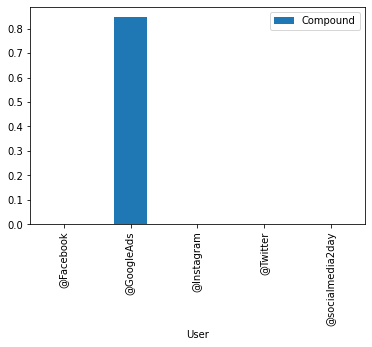

In [45]:
#plotting 
score_table.plot(kind='bar')

In [46]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
score_table

,Positive
User,
@Facebook,0.00
@GoogleAds,0.35
@Instagram,0.00
@Twitter,0.00
@socialmedia2day,0.00


<AxesSubplot:xlabel='User'>

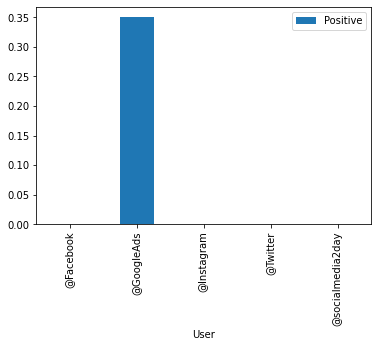

In [47]:
#Collect the negative values for each news source
pos_score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
pos_score_table
pos_score_table.plot(kind='bar')

In [48]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
score_table

,Negative
User,
@Facebook,0.0
@GoogleAds,0.0
@Instagram,0.0
@Twitter,0.0
@socialmedia2day,0.0


<AxesSubplot:xlabel='User'>

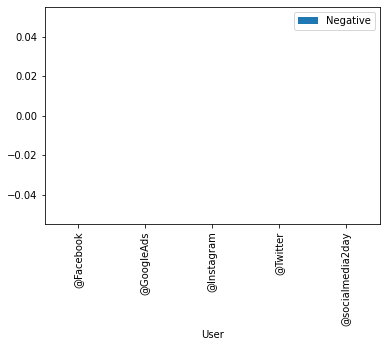

In [49]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table
neg_score_table.plot(kind='bar')

In [50]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
User,
@Facebook,0.0
@GoogleAds,0.0
@Instagram,0.0
@Twitter,0.0
@socialmedia2day,0.0


In [51]:
from pandas import DataFrame
#creates list for top positive hashtags used between comp_searches variable 
from collections import Counter
word_appearance_count = dict(Counter(HT_positive))
df4 = DataFrame (HT_positive, columns = ['Positive HT']) #, 'Count']
print(df4)

Empty DataFrame
Columns: [Positive HT]
Index: []


In [52]:
from collections import Counter
a = dict(Counter(HT_positive))
print(a)

{}


In [53]:
t = list(a.items())
print(t)

[]


In [54]:
import pandas as pd
#tuples = [(letter, idx) for idx, letter in enumerate(t)]
df = pd.DataFrame(t, columns=["Positive Hashtag", "Number of Occurence"])
print(df)

Empty DataFrame
Columns: [Positive Hashtag, Number of Occurence]
Index: []
